In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [34]:
df = pd.read_csv('Churn_Modelling.csv')

In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [37]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [38]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [39]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
# applying one hot encoding
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [43]:
#  Scaling with train the split

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [45]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [46]:
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

##**Applying Keras and Tensorflow**

In [47]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Two type of keras mode**l :-
## **"Sequential" and "Non Sequential"**

In [48]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11)) # input
model.add(Dense(11,activation='sigmoid')) # output
model.add(Dense(1,activation='sigmoid')) # hidden layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='Adam',loss='binary_crossentropy')

In [51]:
model.fit(X_train_trf, y_train, epochs=10, validation_data=(X_test_trf, y_test))


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5385 - val_loss: 0.4905
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4848 - val_loss: 0.4582
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4494 - val_loss: 0.4348
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4417 - val_loss: 0.4236
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4237 - val_loss: 0.4204
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4170 - val_loss: 0.4178
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4322 - val_loss: 0.4158
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4242 - val_loss: 0.4121
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4154 - val_loss: 0.4098
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4095 - val_loss: 0.4071


In [52]:
model.layers[0].get_weights()

[array([[ 7.08923116e-02,  3.58146764e-02,  1.49953319e-02,
          4.39053215e-02, -1.93764418e-01,  3.91441733e-02,
         -2.84991503e-01, -1.07344583e-01, -3.24176960e-02,
          2.44427085e-01, -2.08453700e-01],
        [-1.32977223e+00,  6.95422664e-02,  2.05124497e-01,
          2.39671573e-01,  1.91896331e+00,  1.74150336e+00,
          6.75001919e-01, -6.49204433e-01, -1.87628675e+00,
         -1.92396730e-01,  1.30210996e+00],
        [ 1.44106448e-01,  1.61133081e-01,  2.25449242e-02,
          7.26877525e-02, -1.65453157e-03, -2.95508295e-01,
         -1.88209578e-01,  8.26077536e-02, -5.60263060e-02,
          1.23879150e-01,  1.67485029e-01],
        [-1.12282477e-01,  2.74900207e-03,  6.78353429e-01,
          2.20321298e-01, -3.60690773e-01, -1.68772906e-01,
          1.21422671e-01, -6.36601448e-01, -9.87740699e-03,
          1.01569571e-01,  4.17597055e-01],
        [-1.33796513e-01,  1.76099789e+00,  4.59200323e-01,
          1.62859827e-01, -6.05471015e-01,  

In [53]:
model.layers[1].get_weights()

[array([[-0.06928743,  0.265986  ,  0.22356972,  0.41745856,  0.22175625,
          0.4411587 ,  0.67269075, -0.4673815 ,  0.19774637,  0.0592245 ,
         -0.19331424],
        [ 0.0433372 ,  1.0130167 , -0.9507369 , -0.06492677,  0.09068962,
          0.5249855 ,  0.68442446, -0.3189438 ,  0.5960134 ,  0.06020354,
         -0.7790398 ],
        [-0.46567583, -0.34575775, -0.38849294, -0.569176  , -0.5120614 ,
         -0.5913705 , -0.5024885 , -0.37871268, -0.3266396 ,  0.29957595,
          0.49022323],
        [-0.39021772,  0.00785437,  0.47071934, -0.3227936 ,  0.02632964,
         -0.4897311 ,  0.00121288,  0.38367203, -0.48911795, -0.5283292 ,
          0.16972654],
        [-0.75388974, -0.9471674 ,  0.44659454, -0.7686402 , -0.3818037 ,
         -0.10875655, -0.7688452 ,  0.48851874,  0.06432151, -0.5403121 ,
          0.33104807],
        [-0.77498806, -0.32048818, -0.13764353, -0.5003927 , -0.7249526 ,
         -0.5918071 , -0.6644095 , -0.12498778,  0.09142675, -0.673777 

In [54]:
y_log= model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [55]:
yy =np.where(y_log>0.5,1,0)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yy)

0.8265

In [57]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7661 - loss: 0.5453 - val_accuracy: 0.7969 - val_loss: 0.5090
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8040 - loss: 0.4919 - val_accuracy: 0.7969 - val_loss: 0.5071
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.5058 - val_accuracy: 0.7969 - val_loss: 0.5026
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.5060 - val_accuracy: 0.7969 - val_loss: 0.5017
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8112 - loss: 0.4842 - val_accuracy: 0.7969 - val_loss: 0.5010
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8003 - loss: 0.4959 - val_accuracy: 0.7969 - val_loss: 0.4992
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.5064 - val_accuracy: 0.7969 - val_loss: 0.4986
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 0.5051 - val_accu

In [59]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [60]:
y_pred

array([[0.24845447],
       [0.24845447],
       [0.23391679],
       ...,
       [0.23391679],
       [0.24737112],
       [0.24845447]], dtype=float32)

In [61]:
y_pred = y_pred.argmax(axis=-1)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

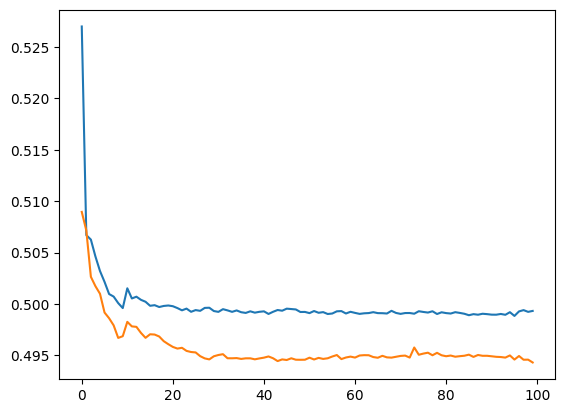

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

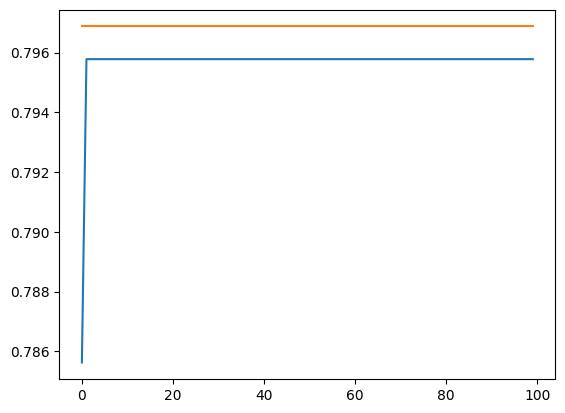

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])